**File name**: main_keras_realization.ipynb<br>
**Authors**: Anton Lukashchuk &lt;[academik116@gmail.com](mailto:academik116@gmail.com)&gt;, Anton Karazeev &lt;[anton.karazeev@gmail.com](mailto:anton.karazeev@gmail.com)&gt;<br>
This file is part of REDE project (https://github.com/akarazeev/REDE)

In [8]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import os
import tqdm
import pickle
import scipy.io as spio

from IPython.display import Image

np.random.seed(123)
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

In [5]:
from keras.models import Model
from keras.layers import Conv2D
from keras.layers import Input, Dense
from keras.layers import Activation, Flatten
from keras.layers import MaxPool2D, Dropout, BatchNormalization
from keras.utils import plot_model
from keras import utils


In [63]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [599]:
import pickle


with open('C:/Users/lukashch/Documents/GitHub/REDE/data/rede/raw/5070-62-111-images.pkl', 'rb') as f:
    img = pickle.load(f)
    
with open('C:/Users/lukashch/Documents/GitHub/REDE/data/rede/raw/5070-frequencies_modes.pkl', 'rb') as f:
    Disp = pickle.load(f)    
    
with open('C:/Users/lukashch/Documents/GitHub/REDE/data/rede/raw/5070-5-parameters.pkl', 'rb') as f:
    parameters_list = pickle.load(f)

In [600]:
img.shape

(5070, 62, 111)

In [601]:
parameters_list[3010]

array([3.50e-07, 1.55e-06, 8.00e-07, 2.00e-05, 8.80e-07])

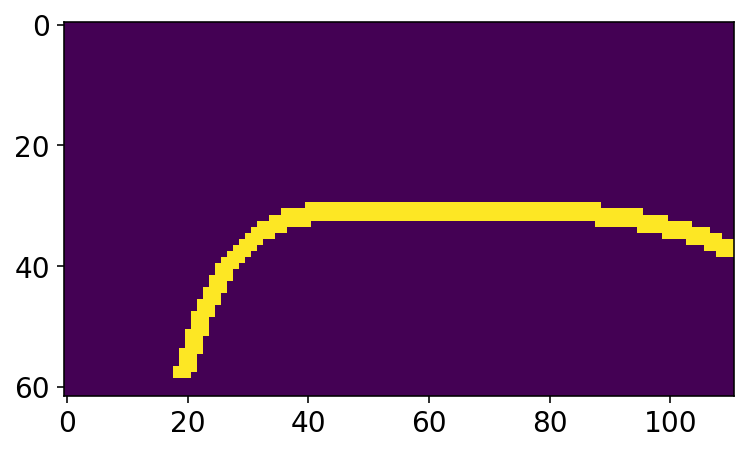

In [603]:
# import matplotlib.cm as cm
# import matplotlib.pyplot as plt


plt.imshow(img[5000])#, cmap=cm.Greys_r)
plt.show()

In [604]:
Disp.shape

(5070, 2, 50)

In [605]:
freq_grid = Disp[0,0,:]
freq_grid

array([1.50e+14, 1.55e+14, 1.60e+14, 1.65e+14, 1.70e+14, 1.75e+14,
       1.80e+14, 1.85e+14, 1.90e+14, 1.95e+14, 2.00e+14, 2.05e+14,
       2.10e+14, 2.15e+14, 2.20e+14, 2.25e+14, 2.30e+14, 2.35e+14,
       2.40e+14, 2.45e+14, 2.50e+14, 2.55e+14, 2.60e+14, 2.65e+14,
       2.70e+14, 2.75e+14, 2.80e+14, 2.85e+14, 2.90e+14, 2.95e+14,
       3.00e+14, 3.05e+14, 3.10e+14, 3.15e+14, 3.20e+14, 3.25e+14,
       3.30e+14, 3.35e+14, 3.40e+14, 3.45e+14, 3.50e+14, 3.55e+14,
       3.60e+14, 3.65e+14, 3.70e+14, 3.75e+14, 3.80e+14, 3.85e+14,
       3.90e+14, 3.95e+14])

In [606]:
Dint = Disp[:,1,:]
Dint.shape

(5070, 50)

In [607]:
X_train, X_test, y_train, y_test = train_test_split(np.array(Dint), np.array(parameters_list)*10**7*[1,1,1,1e-2,1],
                                                  test_size=0.2,
                                                  random_state=42)

In [608]:
X_train.shape

(4056, 50)

In [609]:
sc = StandardScaler()
sc.fit_transform(X_train,y_train)
sc.transform(X_test, y_test)

C:\Users\lukashch\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:675: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)


array([[-0.90867512, -0.86860248, -0.82651408, ...,  0.46336936,
         0.48335698,  0.5020384 ],
       [ 0.55700102,  0.61819261,  0.67060301, ...,  1.28108283,
         1.21810288,  1.16333774],
       [ 0.40467559,  0.44131716,  0.47404122, ...,  0.89987021,
         0.88401011,  0.86797456],
       ...,
       [-0.17308039, -0.19390666, -0.21365399, ..., -0.70282562,
        -0.68739114, -0.6719052 ],
       [ 1.44915211,  1.39588821,  1.34358009, ..., -0.26849714,
        -0.30052332, -0.33099853],
       [-0.39775457, -0.43636651, -0.47323738, ...,  0.30557833,
         0.34187546,  0.37661035]])

In [612]:
inputs = Input(shape=(50,))
x = BatchNormalization()(inputs)
x = Dense(1000,activation='relu')(x)
# x = Dense(50,activation='relu')(x)
# x = Dropout(0.05, noise_shape=None, seed=None)(x)
# x = Dense(22,activation='relu')(inputs)

x = BatchNormalization()(x)
x = Dense(20,activation='relu')(x)
# x = Dropout(0.05, noise_shape=None, seed=None)(x)

x = BatchNormalization()(x)
out = Dense(5,activation='linear')(x)

model = Model(inputs=inputs, outputs=out)

In [613]:
model.compile(optimizer='Nadam',
                loss='mean_squared_error')

In [614]:
history = model.fit(X_train, y_train,
                               batch_size=32,
                               epochs=80, verbose=2,
                               validation_split=.20,
                            )#validation_data=(X_test,y_test))

Train on 3244 samples, validate on 812 samples
Epoch 1/80
 - 8s - loss: 66.9275 - val_loss: 50.2269
Epoch 2/80
 - 4s - loss: 29.3780 - val_loss: 13.6793
Epoch 3/80
 - 2s - loss: 5.8865 - val_loss: 2.2129
Epoch 4/80
 - 2s - loss: 1.0133 - val_loss: 0.5081
Epoch 5/80
 - 2s - loss: 0.3464 - val_loss: 0.3396
Epoch 6/80
 - 2s - loss: 0.2843 - val_loss: 0.2748
Epoch 7/80
 - 2s - loss: 0.2723 - val_loss: 0.2665
Epoch 8/80
 - 2s - loss: 0.2728 - val_loss: 0.2845
Epoch 9/80
 - 3s - loss: 0.2737 - val_loss: 0.2789
Epoch 10/80
 - 2s - loss: 0.2688 - val_loss: 0.2694
Epoch 11/80
 - 2s - loss: 0.2668 - val_loss: 0.2657
Epoch 12/80
 - 2s - loss: 0.2687 - val_loss: 0.2789
Epoch 13/80
 - 2s - loss: 0.2661 - val_loss: 0.2704
Epoch 14/80
 - 4s - loss: 0.2631 - val_loss: 0.2806
Epoch 15/80
 - 3s - loss: 0.2638 - val_loss: 0.2725
Epoch 16/80
 - 4s - loss: 0.2625 - val_loss: 0.2809
Epoch 17/80
 - 3s - loss: 0.2633 - val_loss: 0.2755
Epoch 18/80
 - 2s - loss: 0.2619 - val_loss: 0.2604
Epoch 19/80
 - 2s - lo

Text(0.5,1,'Adam-opt & MSE')

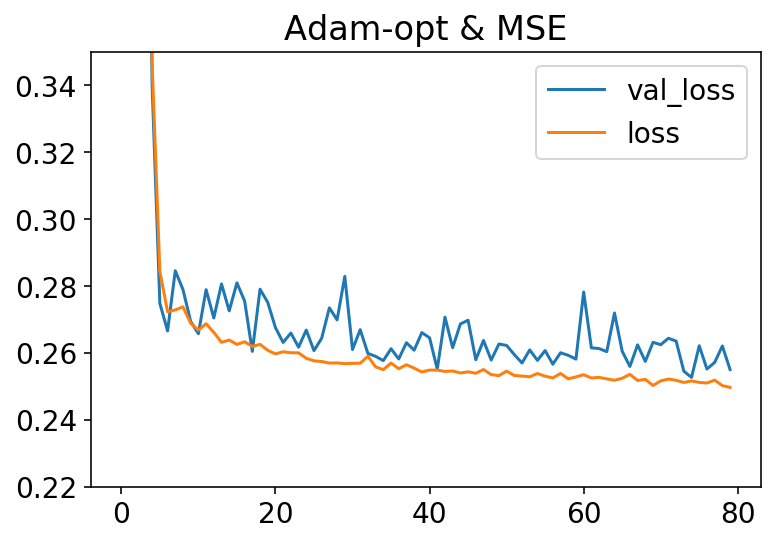

In [621]:
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_acc'], label='val_acc')
# plt.plot(history.history['acc'], label='acc')
plt.ylim([0.22, 0.35])
plt.legend()
plt.title('Adam-opt & MSE')

In [622]:
model.evaluate(X_test,y_test)

1014/1014 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 345us/step


0.25523141443846964

In [623]:
print('mse score  = ', mse(model.predict(X_test),y_test) )

mse score  =  0.25523139403093553


In [466]:
a= np.random.randint(1,len(y_test),10)
a

array([154,  54,  14,  32, 277, 383, 123, 272, 508, 551])

In [468]:
y_test[a]

array([[ 3.5 , 14.5 ,  7.5 ,  2.4 ,  8.  ],
       [ 3.  , 15.5 ,  7.6 ,  1.65,  9.6 ],
       [ 2.5 , 15.5 ,  6.4 ,  1.55,  9.6 ],
       [ 3.5 , 15.5 ,  8.  ,  2.2 ,  8.  ],
       [ 3.  , 15.5 ,  7.2 ,  1.55,  8.4 ],
       [ 3.5 , 15.5 ,  6.8 ,  1.55,  9.6 ],
       [ 3.  , 15.5 ,  8.5 ,  1.8 , 10.  ],
       [ 4.  , 15.  ,  6.  ,  1.75,  7.6 ],
       [ 2.5 , 14.5 ,  7.  ,  2.4 ,  8.4 ],
       [ 4.  , 14.5 ,  8.5 ,  1.9 , 10.  ]])

In [467]:
model.predict(X_test)[a]

array([[ 3.3143342, 14.9358635,  7.576552 ,  1.9447037,  8.548236 ],
       [ 2.9594233, 14.9880295,  7.8288393,  1.9011168,  9.482163 ],
       [ 3.1460183, 15.228081 ,  7.058155 ,  1.9260627,  9.692702 ],
       [ 3.4182646, 15.498358 ,  7.0852118,  1.9343007,  8.853269 ],
       [ 3.3239105, 15.008889 ,  7.32713  ,  1.9090928,  8.689564 ],
       [ 3.0878284, 15.083664 ,  7.5174565,  1.9432529,  9.540515 ],
       [ 3.3618717, 15.127085 ,  8.252455 ,  1.8655368,  9.490334 ],
       [ 3.4425998, 15.472049 ,  7.1377964,  1.9095007,  8.77194  ],
       [ 3.243337 , 15.221086 ,  7.312777 ,  2.0029273,  8.727796 ],
       [ 2.924205 , 14.94679  ,  8.190481 ,  1.8111858,  9.131056 ]],
      dtype=float32)

In [412]:
model.predict(X_test)[0]-y_test[0]

array([-0.22842622, -0.24478626, -0.17896032, -5.30073547, -0.02171631])

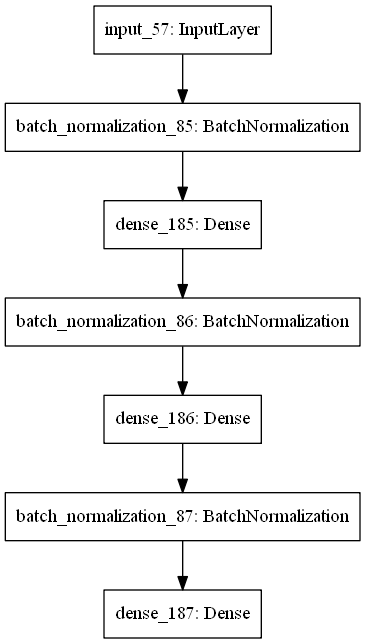

In [597]:
plot_model(model, to_file='basic-net.png')

Image(filename="basic-net.png")

In [615]:
X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(img, 
                                                np.array(parameters_list)*10**7*[1,1,1,1e-2,1],
                                                test_size=0.2,
                                                random_state=42)

In [616]:
X_train_im = X_train_im.reshape(X_train.shape[0], 62, 111, 1).astype(np.float64)
X_test_im = X_test_im.reshape(X_test.shape[0], 62, 111, 1).astype(np.float64)

In [617]:
X_train_im.shape

(4056, 62, 111, 1)

In [629]:
input_image = Input(shape=(62, 111, 1))
x = Conv2D(32, 4, strides=1, activation='relu')(input_image)
x = MaxPool2D(2, strides=2)(x)
x = Conv2D(64, 2, strides=1, activation='relu')(x)
x = MaxPool2D(2, strides=2)(x)

x = Flatten()(x)

x = Dense(100, activation='relu')(x)
x = Dense(5, activation='linear')(x)
convnet = Model(inputs=input_image, outputs=x)

In [631]:
convnet.compile(optimizer='adam',
                loss='mean_squared_error'
                )

In [632]:

history_callback = convnet.fit(X_train_im, y_train_im,
                               batch_size=32,
                               epochs=80, verbose=2,
                               validation_split=.2)

Train on 3244 samples, validate on 812 samples
Epoch 1/80
 - 45s - loss: 138.0183 - val_loss: 0.5525
Epoch 2/80
 - 42s - loss: 0.4493 - val_loss: 0.3825
Epoch 3/80
 - 46s - loss: 0.3519 - val_loss: 0.3593
Epoch 4/80
 - 41s - loss: 0.3422 - val_loss: 0.4006
Epoch 5/80
 - 41s - loss: 0.3545 - val_loss: 0.3683
Epoch 6/80
 - 42s - loss: 0.3132 - val_loss: 0.3349
Epoch 7/80
 - 39s - loss: 0.3147 - val_loss: 0.3391
Epoch 8/80
 - 45s - loss: 0.3131 - val_loss: 0.3598
Epoch 9/80
 - 43s - loss: 0.3156 - val_loss: 0.3448
Epoch 10/80
 - 41s - loss: 0.3123 - val_loss: 0.3618
Epoch 11/80
 - 43s - loss: 0.3103 - val_loss: 0.3483
Epoch 12/80
 - 42s - loss: 0.3082 - val_loss: 0.3591
Epoch 13/80
 - 43s - loss: 0.3094 - val_loss: 0.3627
Epoch 14/80
 - 42s - loss: 0.3152 - val_loss: 0.3497
Epoch 15/80
 - 37s - loss: 0.3787 - val_loss: 0.3626
Epoch 16/80
 - 37s - loss: 0.3329 - val_loss: 0.3609
Epoch 17/80
 - 38s - loss: 0.2990 - val_loss: 0.3306
Epoch 18/80
 - 38s - loss: 0.2919 - val_loss: 0.3342
Epoch 

KeyboardInterrupt: 

Text(0.5,1,'Adam-opt & MSE')

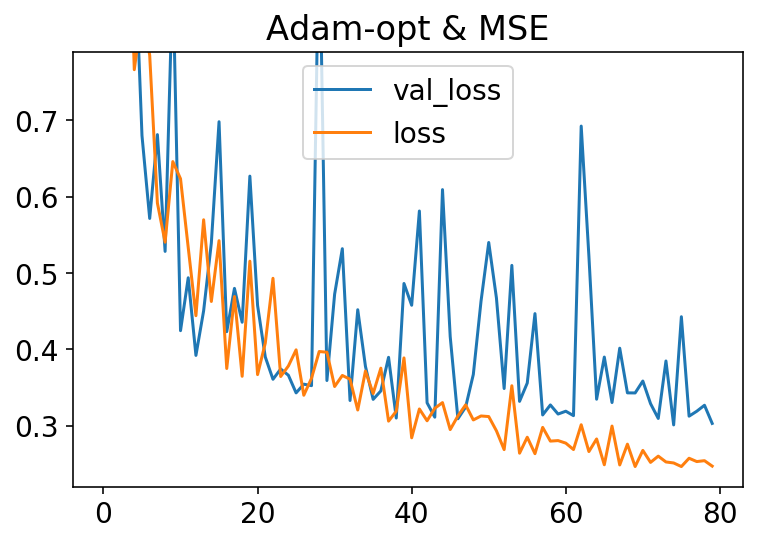

In [628]:
plt.plot(history_callback.history['val_loss'], label='val_loss')
plt.plot(history_callback.history['loss'], label='loss')
# plt.plot(history.history['val_acc'], label='val_acc')
# plt.plot(history.history['acc'], label='acc')
plt.ylim([0.22, 0.79])
plt.legend()
plt.title('Adam-opt & MSE')

In [625]:
convnet.evaluate(X_test_im,y_test_im)

1014/1014 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 1ms/step


0.30836221170143263

In [626]:
print('mse score  = ', mse(convnet.predict(X_test_im),y_test_im) )

mse score  =  0.30836219374642665


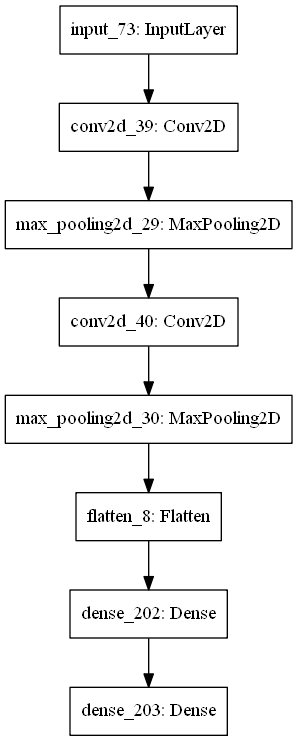

In [598]:
plot_model(convnet, to_file='conv-net.png')

Image(filename="conv-net.png")

## Let's try to combine both types of NN. One with vector input and convolutional with image input.

In [634]:
from keras.layers.merge import concatenate

In [636]:
inputs1 = Input(shape=(50,))
x = BatchNormalization()(inputs1)
x = Dense(500,activation='relu')(x)
# x = Dense(50,activation='relu')(x)
# x = Dropout(0.05, noise_shape=None, seed=None)(x)
# x = Dense(22,activation='relu')(inputs)

x = BatchNormalization()(x)
x = Dense(20,activation='relu')(x)
# x = Dropout(0.05, noise_shape=None, seed=None)(x)

x = BatchNormalization()(x)
out1 = Dense(5,activation='linear')(x)

inputs2 = Input(shape=(62, 111, 1))
x = Conv2D(32, 4, strides=2, activation='relu')(inputs2)
x = MaxPool2D(2, strides=2)(x)
x = Conv2D(64, 2, strides=1, activation='relu')(x)
x = MaxPool2D(2, strides=2)(x)

out2 = Flatten()(x)

# merge input models
merge = concatenate([out1, out2])
# interpretation model
x = Dense(10, activation='relu')(merge)
x = Dense(10, activation='relu')(x)
output = Dense(5, activation='linear')(x)
combined = Model(inputs=[inputs1, inputs2], outputs=output)

In [669]:
combined.compile(optimizer='adam',
                loss='mean_squared_error'
                )

In [680]:
history_combined = combined.fit( [X_train, X_train_im], y_train_im,
                               batch_size=32,
                               epochs=2, verbose=2,
                               validation_data=(np.array(X_test_double), y_test_im))

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 2 array(s), but instead got the following list of 1 arrays: [array([[array([-2.16766121e+12, -1.81288407e+12, -1.49843944e+12, -1.22281169e+12,
       -9.84475739e+11, -7.81816721e+11, -6.12858344e+11, -4.74534979e+11,
       -3.63058879e+11, -2.74448104e+11, ...

In [646]:
X_train.shape

(4056, 50)

In [647]:
X_train_im.shape

(4056, 62, 111, 1)

ValueError: could not broadcast input array from shape (4056,50) into shape (4056)

In [653]:
X_train_im[2].shape

(62, 111, 1)

In [662]:
X_train_double = []
for i in range(4056):
    X_train_double.append([X_train[i],X_train_im[i]])

In [678]:
np.array(X_train_double).shape

(4056, 2)

In [664]:
X_test_double = []
for i in range(len(X_test)):
    X_test_double.append([X_test[i],X_test_im[i]])